In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [4]:
# step 1 : Load Data
california = fetch_california_housing()
df = pd.DataFrame(california.data,columns=california.feature_names)
df['price']=california.target
print("DataSet",df.head())

DataSet    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


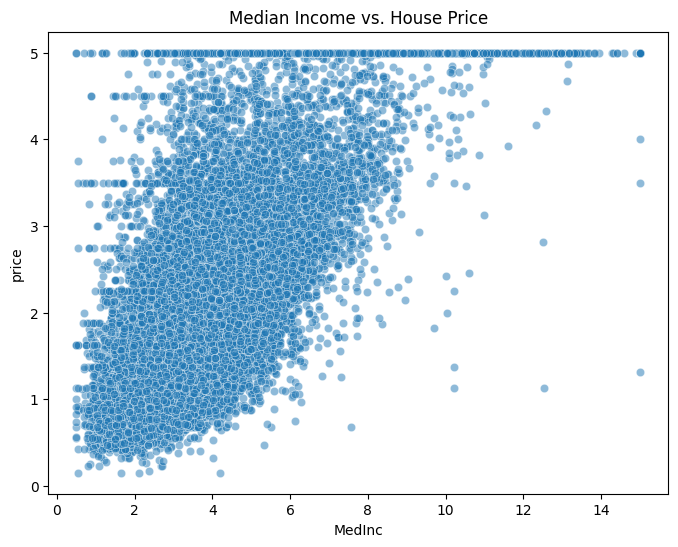

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='MedInc',y='price',data=df, alpha=0.5)
plt.title('Median Income vs. House Price')
plt.show()

In [7]:
print("\nCorrelation with price:\n", df.corr()['price'].sort_values())


Correlation with price:
 Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
price         1.000000
Name: price, dtype: float64


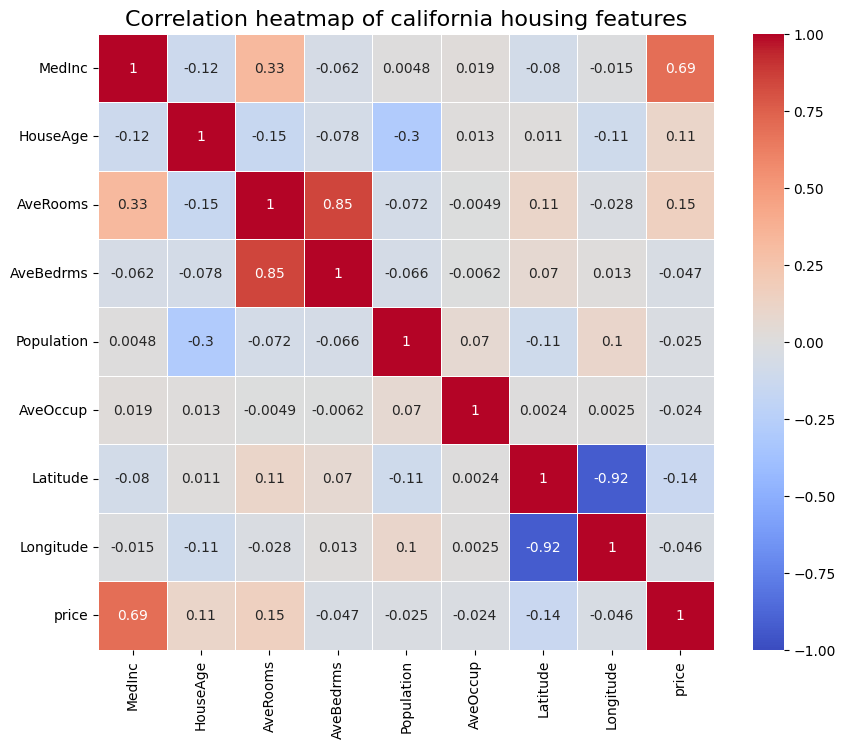

In [10]:
#calculate correlation matrix
corr_matrix = df.corr()

#set up the olot
plt.figure(figsize=(10,8)) #Size of the heatmap
#create heatmap
sns.heatmap(corr_matrix,
            annot=True,#show numbers in square
            cmap='coolwarm',#color scheme (red=positive,blue=neg)
            vmin=-1,vmax=1, #range of correlation values
            center =0,#center colormap at 0
            square=True,#make squares uniform
            linewidths=0.5)#line between squares

#Add title
plt.title('Correlation heatmap of california housing features',fontsize=16)
plt.show()


In [14]:
#prepare Data
X = df[['MedInc']]
y = df['price']
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [15]:
#Linear Regression
model = LinearRegression()
model.fit(X_train,y_train)
print(f"\nLinear Equation: price = {model.coef_[0]:.2f} * MedInc + {model.intercept_:.2f}")


Linear Equation: price = 0.42 * MedInc + 0.45


In [16]:
# Predict and Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

In [17]:
print(f"\n Mean Absolute Error: {mae:.2f} $100K")
print(f"Root Mean Square: {rmse:.2f} $100K")
print(f"R^2: {r2:.2f}")


 Mean Absolute Error: 0.62 $100K
Root Mean Square: 0.83 $100K
R^2: 0.47


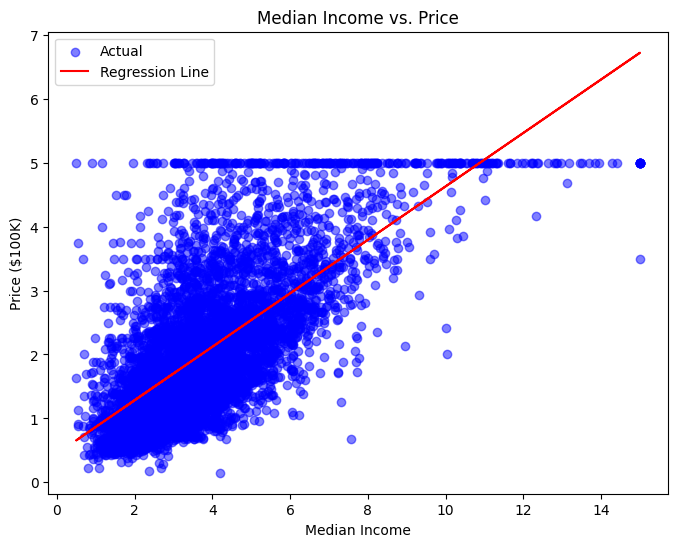

In [18]:
# visualize
plt.figure(figsize=(8,6))
plt.scatter(X_test,y_test, color ='blue',label='Actual',alpha=0.5)
plt.plot(X_test,y_pred,color = 'red',label = "Regression Line")
plt.title('Median Income vs. Price')
plt.xlabel('Median Income')
plt.ylabel('Price ($100K)')
plt.legend()
plt.show()